In [ ]:
!unzip ../data/raw/Cat.zip
!mv ResizedCat Cat

In [ ]:
!unzip ../data/raw/Dog.zip
!mv ResizedDog Dog

In [ ]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

In [ ]:
!pip install tensorflow

In [10]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # para imagenes
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # modelo secuencial que toma paso por paso para generar la arq
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten # Conv2D: Convolusion y centralizacion de la imagen. Dropout: La red no se memoriza la red entera.
# Flatten estira la matriz.
from tensorflow.keras.layers import Activation, BatchNormalization #Funcion de activacion
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img 
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

2022-08-10 22:51:41.564018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-10 22:51:41.564055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


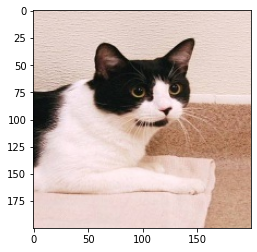

In [11]:
# Sample a cat image
sample_cat = mpimg.imread('Cat/image3814.jpg') # imread permite ver la imagen
plt.imshow(sample_cat)
plt.show()

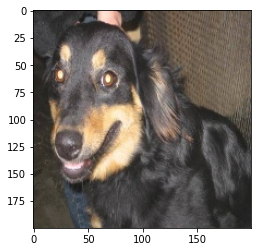

In [12]:
# Sample a dog image
sample_dog = mpimg.imread('Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [14]:
# Count total images
data_dir = pathlib.Path('./')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

25000

In [20]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32 

train_ds = tf.keras.utils.image_dataset_from_directory( # image dataset from directory nombra cada elemento con el nombre de la carpeta
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [21]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [23]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [22]:
# Create the deep learning architecture
# resnet architecture https://medium.com/analytics-vidhya/understanding-resnet-architecture-869915cc2a98
# https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035

IMAGE_CHANNELS=3 # las imagenes a color tienen 3 canales: Rojo, Verde y Azul (RGB)

model = Sequential([

# Capa 1
Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25), # tecnica para que la red no se aprenda exactamente los datos, elimino el 25%

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

# ultima capa
Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 97, 97, 64)      

In [24]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 803s 1s/step - loss: 0.6601 - accuracy: 0.6772 - val_loss: 0.9591 - val_accuracy: 0.6024
Epoch 2/10
625/625 [==============================] - 847s 1s/step - loss: 0.5089 - accuracy: 0.7482 - val_loss: 1.2746 - val_accuracy: 0.6258
Epoch 3/10
625/625 [==============================] - 854s 1s/step - loss: 0.4417 - accuracy: 0.7921 - val_loss: 0.4567 - val_accuracy: 0.7802
Epoch 4/10
 42/625 [=>............................] - ETA: 12:36 - loss: 0.4012 - accuracy: 0.8140